(1) Load this csv in pandas dataframe and first plot histograms for height and weight parameters

(2) Using IQR detect weight outliers and print them

(3) Using IQR, detect height outliers and print them

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


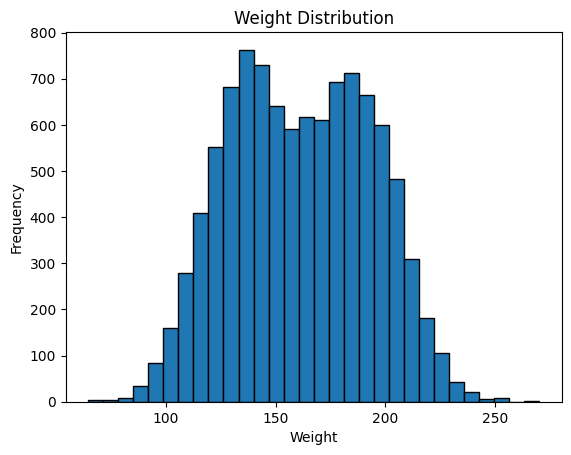

In [6]:
plt.hist(df['Weight'], bins=30, edgecolor='black')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Weight Distribution')
plt.show()

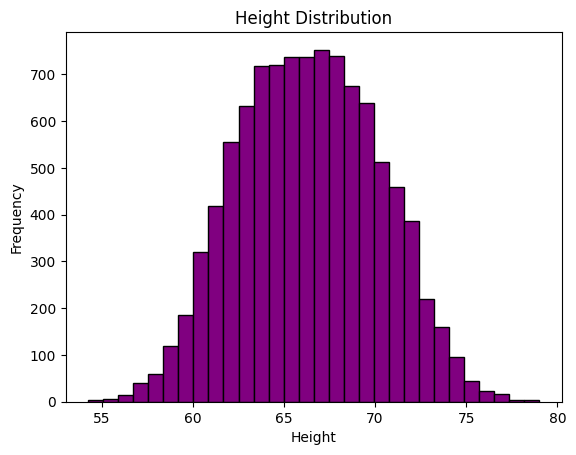

In [10]:
plt.hist(df['Height'], bins=30, edgecolor='black',color='purple')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Height Distribution')
plt.show()

IQR calculation for weights

In [11]:
Q1_wt = df['Weight'].quantile(0.25)
Q3_wt = df['Weight'].quantile(0.75)
Q1_wt, Q3_wt

(np.float64(135.8180513055015), np.float64(187.16952486868348))

In [14]:
IQR_wt = Q3_wt - Q1_wt
IQR_wt

np.float64(51.35147356318197)

In [15]:
lower_bound_wt = Q1_wt - 1.5 * IQR_wt
upper_bound_wt = Q3_wt + 1.5 * IQR_wt
lower_bound_wt, upper_bound_wt

(np.float64(58.79084096072856), np.float64(264.19673521345646))

In [25]:
df[(df['Weight'] > upper_bound_wt) | (df['Weight'] < lower_bound_wt)].shape[0]

1

In [26]:
df[(df['Weight'] > upper_bound_wt) | (df['Weight'] < lower_bound_wt)]

,Gender,Height,Weight
2014,Male,78.998742,269.989699


IQR Calculation for heights

In [16]:
Q1_ht = df['Height'].quantile(0.25)
Q3_ht = df['Height'].quantile(0.75)
Q1_ht, Q3_ht

(np.float64(63.505620481218955), np.float64(69.1742617268347))

In [17]:
IQR_ht = Q3_ht - Q1_ht
IQR_ht

np.float64(5.668641245615746)

In [18]:
lower_bound_ht = Q1_ht - 1.5 * IQR_ht
upper_bound_ht = Q3_ht + 1.5 * IQR_ht
lower_bound_ht, upper_bound_ht

(np.float64(55.00265861279534), np.float64(77.67722359525831))

In [23]:
df[(df['Height'] > upper_bound_ht) | (df['Height'] < lower_bound_ht)].shape[0]

8

In [24]:
df[(df['Height'] > upper_bound_ht) | (df['Height'] < lower_bound_ht)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [27]:
df_new = df[(df['Height'] <= upper_bound_ht) & (df['Height'] >= lower_bound_ht) &
            (df['Weight'] <= upper_bound_wt) & (df['Weight'] >= lower_bound_wt)]

In [28]:
df_new.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [29]:
# Original dataframe size
print("Original dataframe size:", df.shape[0])

# New dataframe size (without outliers)
print("New dataframe size:", df_new.shape[0])

# Number of rows removed
print("Rows removed:", df.shape[0] - df_new.shape[0])

Original dataframe size: 10000
New dataframe size: 9992
Rows removed: 8
